<a href="https://colab.research.google.com/github/Abishethvarman/ML-Models/blob/main/thaksha_s_w_defects_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [75]:
%cd /mydrive/dataset/

/content/gdrive/My Drive/dataset


In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [77]:
data = pd.read_csv("Thaksha_Data_Software_Defects.csv")

In [78]:
data.head(5)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,...,65,10,6,0,18.0,25.0,107.0,64.0,21.0,True
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,...,37,2,5,0,16.0,28.0,89.0,52.0,15.0,True
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,...,21,0,2,0,11.0,10.0,41.0,17.0,5.0,True


In [79]:
data['label'] = data['defects'].map({True: 1, False: 0})

In [80]:
data.head(2)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,label
0,1.1,1.4,1.4,1.4,1.3,1.3,1.3,1.3,1.3,1.3,...,2,2,2,1.2,1.2,1.2,1.2,1.4,False,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,1.0,1.0,1.0,1.0,1.0,True,1


In [81]:
from sklearn.preprocessing import StandardScaler
scaled_features = data.copy()
col_names = ['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i',
       'e', 'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment',
       'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount'
      ]
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features
final_data = pd.DataFrame(scaled_features)
final_data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,label
0,-0.519973,-0.367367,-0.266592,-0.281636,-0.455738,-0.349703,5.529006,-0.683769,-0.828519,-0.083502,...,-0.094718,-0.224157,0.296605,-1.027316,-0.586106,-0.445811,-0.449958,-0.421419,False,0
1,-0.521420,-0.401425,-0.331220,-0.330176,-0.457045,-0.349872,4.066588,-0.701103,-0.837555,-0.083503,...,-0.197543,-0.327308,0.051426,-1.048490,-0.593891,-0.447251,-0.452119,-0.440816,True,1
2,0.664680,0.450005,-0.331220,0.883322,0.283662,0.173060,-0.613152,0.572303,0.345238,-0.026198,...,0.727882,0.188446,-0.193753,0.751349,0.340338,0.315847,0.228514,0.528996,True,1
3,0.129488,0.194576,0.476631,0.519273,0.152949,0.083857,-0.466911,0.099687,0.692817,-0.052848,...,-0.094718,0.085295,-0.193753,0.539603,0.457116,0.186264,0.098870,0.238052,True,1
4,-0.174269,-0.231139,-0.331220,-0.087477,-0.208690,-0.206712,-0.271921,-0.218665,-0.046918,-0.077120,...,-0.300368,-0.224157,-0.193753,0.010239,-0.243555,-0.159290,-0.279260,-0.246853,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15113,-0.449097,-0.145996,0.153491,-0.330176,-0.348117,-0.296157,-0.418163,0.011288,-0.650212,-0.080067,...,-0.300368,-0.430459,0.296605,-0.095634,-0.516038,-0.324868,-0.376493,-0.149872,False,0
15114,-0.391238,-0.060853,0.315061,-0.330176,-0.274047,-0.247384,-0.564405,0.454438,-0.605635,-0.073223,...,-0.300368,-0.430459,0.051426,0.327857,-0.438186,-0.252877,-0.300867,-0.052891,False,0
15115,-0.463561,-0.231139,-0.008080,-0.330176,-0.387331,-0.314944,0.215552,-0.481550,-0.472808,-0.082696,...,-0.300368,-0.430459,-0.193753,-0.307380,-0.438186,-0.375261,-0.398101,-0.246853,False,0
15116,-0.275521,0.194576,0.315061,0.155223,0.022236,-0.004527,-0.613152,0.565370,-0.061977,-0.045842,...,-0.300368,-0.430459,0.051426,1.174840,0.301411,-0.015309,0.077262,0.238052,False,0


In [82]:
x = final_data[col_names]
y = data['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [83]:
print(final_data)

            loc      v(g)     ev(g)     iv(g)         n         v         l  \
0     -0.519973 -0.367367 -0.266592 -0.281636 -0.455738 -0.349703  5.529006   
1     -0.521420 -0.401425 -0.331220 -0.330176 -0.457045 -0.349872  4.066588   
2      0.664680  0.450005 -0.331220  0.883322  0.283662  0.173060 -0.613152   
3      0.129488  0.194576  0.476631  0.519273  0.152949  0.083857 -0.466911   
4     -0.174269 -0.231139 -0.331220 -0.087477 -0.208690 -0.206712 -0.271921   
...         ...       ...       ...       ...       ...       ...       ...   
15113 -0.449097 -0.145996  0.153491 -0.330176 -0.348117 -0.296157 -0.418163   
15114 -0.391238 -0.060853  0.315061 -0.330176 -0.274047 -0.247384 -0.564405   
15115 -0.463561 -0.231139 -0.008080 -0.330176 -0.387331 -0.314944  0.215552   
15116 -0.275521  0.194576  0.315061  0.155223  0.022236 -0.004527 -0.613152   
15117 -0.159804  1.046006  1.607622  0.276573  0.532016  0.403092 -0.661900   

              d         i         e  ...  lOComment

In [84]:
#thani int value endathala scale panran matra values aiyum
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [85]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train_scaled, y_train)

SVC(kernel='linear')

In [86]:
# predictionkum scale pannina data ah edukiran
svm_predictions = svm_model.predict(x_test_scaled)

In [88]:
linear_svm_precision = precision_score(y_test, svm_predictions, average='weighted')
linear_svm_accuracy = accuracy_score(y_test, svm_predictions)
linear_svm_F1Score = f1_score(y_test, svm_predictions)

print("Linear SVM Accuracy:", linear_svm_accuracy)
print("Linear SVM Precision:", linear_svm_precision)
print("Linear SVM F1Score:", linear_svm_F1Score)

Linear SVM Accuracy: 0.826278659611993
Linear SVM Precision: 0.8564977360415182
Linear SVM F1Score: 0.015


In [102]:
# kernel illama
linear_svm_model = LinearSVC(max_iter=10000)
linear_svm_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=10000)

In [103]:
linear_svm_predictions = linear_svm_model.predict(x_test)

In [105]:
linear_svm_precision = precision_score(y_test, linear_svm_predictions, average='weighted')
linear_svm_recall = recall_score(y_test, linear_svm_predictions, average='weighted')
linear_svm_f1 = f1_score(y_test, linear_svm_predictions, average='weighted')
linear_svm_accuracy = accuracy_score(y_test, linear_svm_predictions)

print("Linear SVM Model Accuracy:", linear_svm_accuracy)
print("Linear SVM Precision:", linear_svm_precision)
print("Linear SVM Recall:", linear_svm_recall)
print("Linear SVM F1 Score:", linear_svm_f1)

Linear SVM Model Accuracy: 0.8306878306878307
Linear SVM Precision: 0.7960695298171194
Linear SVM Recall: 0.8306878306878307
Linear SVM F1 Score: 0.7764550313839004


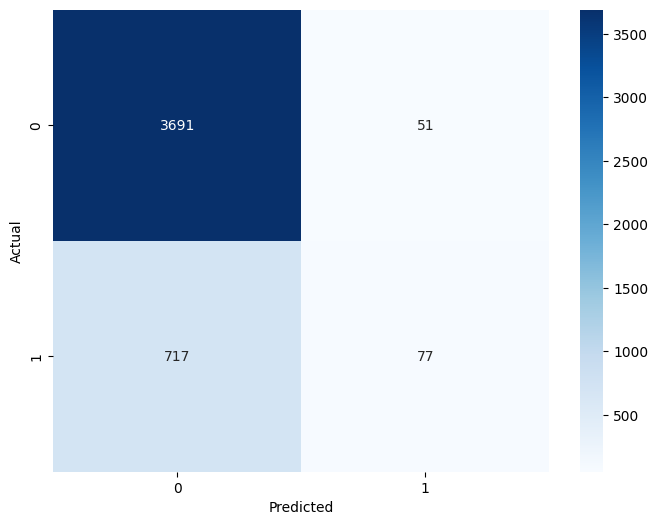

In [106]:
linear_svm_cm = confusion_matrix(y_test, linear_svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(linear_svm_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()